# K-means clustering: intuitive explanation

The notebook provides an intuitive description and explanation of the k-means clustering technique. A synthetic dataset will be used to identify clusters manually.


## Acknowledgments

- Inquiries: mauricio.antelis@tec.mx


# Importing libraries

In [8]:
# Import the packages that we will be using
import pandas as pd
import matplotlib.pyplot as plt


# Crear data

In [3]:
# Create synthetic data
d = {'x1': [2, 4, 2, 6, 6],
     'x2': [2, 3, 4, 6, 5]}

# Construct dataframe
dataset = pd.DataFrame(data=d)



# Undertanding and preprocessing the data

1. Get a general 'feel' of the data


In [7]:
dataset.columns

# Tenemos 5 observaciones
# Tenemos 2 variables

Index(['x1', 'x2'], dtype='object')

2. Scatter plot of the data

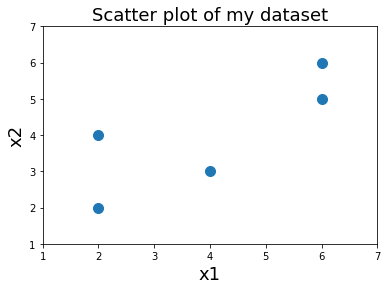

In [11]:
plt.scatter(dataset.x1, dataset.x2, s=100)
plt.title('Scatter plot of my dataset', fontsize=18)
plt.xlabel('x1', fontsize=18)
plt.ylabel('x2', fontsize=18)

plt.xlim(1,7)
plt.ylim(1,7)


plt.show()


Note that for this dataset we do not know in advance the cluster/group/class to which each point belongs to, and that is what we want to do: to identify the existing cluster/group/class, i.e., to assing each point to a cluster/group/class

3. Preprocessing the data

No preprocessing is required

# Kmeans clustering

Intuitive explanation

### Initialize/Preliminaries

In [12]:
# Compute the number of points in the dataset
index = dataset.index
Npoints = len(index)

print(Npoints)

5


## 1: Specify the number of clusters

Define the number $K$ of clusters

In [24]:
# Let's assume our data has two clusters (note that the rest of the code is for K=2)

K = 2

## 2: Initialize the centroids of the clusters

Randomly initialize the centroids of the clusters $C_1, C_2, \cdots, C_K$

In [13]:
# Let's initialize the centroids for the K=2 clusters (this has to be done randomly)

import numpy as np

C1 = np.array([1.5, 3.0]) # This is 1st centroid
C2 = np.array([3.0, 3.0]) # This is 2nd centroid

print(C1)
print(C2)



[1.5 3. ]
[3. 3.]


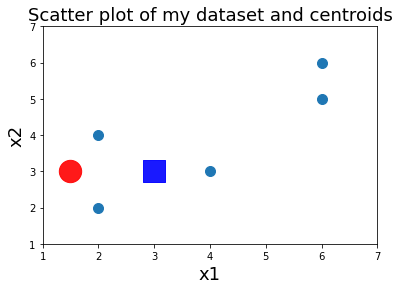

In [17]:
# Plot the points and the centroids

plt.scatter(dataset.x1, dataset.x2, s=100)

plt.scatter(C1[0], C1[1], color='r', marker='o', s=500, alpha=0.9)
plt.scatter(C2[0], C2[1], color='b', marker='s', s=500, alpha=0.9)

plt.title('Scatter plot of my dataset and centroids', fontsize=18)
plt.xlabel('x1', fontsize=18)
plt.ylabel('x2', fontsize=18)

plt.xlim(1,7)
plt.ylim(1,7)


plt.show()


## 3:  Repeat the following


Define the current centroids

In [53]:
C1 = C1new
C2 = C2new

## 4: Assign each point  to its closest centroid

Compute the distance of each data point to each centroid

Assign each point to the centroid with the minimum Euclidean distance

Euclidean distance:
- Consider two points $x=(x_1,x_2)$ and  $y=(y_1,y_2)$.
- The Euclidean distance between these two points is 
$ d = \sqrt {\left( {x_1 - x_2 } \right)^2 + \left( {y_1 - y_2 } \right)^2 } $


In [54]:
dataset

,x1,x2
0,2,2
1,4,3
2,2,4
3,6,6
4,6,5


In [56]:
# Compute the distance of each data point to each centroid

Dis2Centroids = np.zeros((Npoints,K))

# Let's compute the distance manually
ipoint, x1, x2  = 0, 2, 2 # See the dataset
Dis2Centroids[ipoint,0] = np.sqrt( (x1-C1[0])**2 + (x2-C1[1])**2 )
Dis2Centroids[ipoint,1] = np.sqrt( (x1-C2[0])**2 + (x2-C2[1])**2 )

ipoint, x1, x2  = 1, 4, 3 # See the dataset
Dis2Centroids[ipoint,0] = np.sqrt( (x1-C1[0])**2 + (x2-C1[1])**2 )
Dis2Centroids[ipoint,1] = np.sqrt( (x1-C2[0])**2 + (x2-C2[1])**2 )

ipoint, x1, x2  = 2, 2, 4 # See the dataset
Dis2Centroids[ipoint,0] = np.sqrt( (x1-C1[0])**2 + (x2-C1[1])**2 )
Dis2Centroids[ipoint,1] = np.sqrt( (x1-C2[0])**2 + (x2-C2[1])**2 )

ipoint, x1, x2  = 3, 6, 6 # See the dataset
Dis2Centroids[ipoint,0] = np.sqrt( (x1-C1[0])**2 + (x2-C1[1])**2 )
Dis2Centroids[ipoint,1] = np.sqrt( (x1-C2[0])**2 + (x2-C2[1])**2 )

ipoint, x1, x2  = 4, 6, 5 # See the dataset
Dis2Centroids[ipoint,0] = np.sqrt( (x1-C1[0])**2 + (x2-C1[1])**2 )
Dis2Centroids[ipoint,1] = np.sqrt( (x1-C2[0])**2 + (x2-C2[1])**2 )

print(Dis2Centroids)


[[1.20185043 5.31507291]
 [1.33333333 3.20156212]
 [1.20185043 4.27200187]
 [4.48454135 0.5       ]
 [3.88730126 0.5       ]]


In [57]:
# Assign each point to the centroid with the minimum Euclidean distance
#cluster = np.array([1, 2, 1, 2, 2,])
#cluster = np.array([1, 1, 1, 2, 2])
cluster = np.array([1, 1, 1, 2, 2])


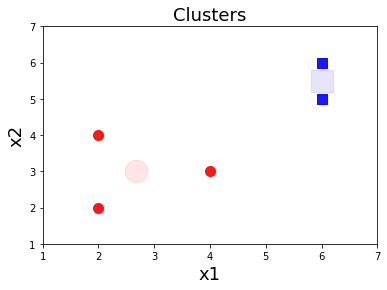

In [58]:
# Scatter plot of the data asigning each point to the cluster it belongs to ¡¡

df1 = dataset[cluster==1]
df2 = dataset[cluster==2]

#print(dataset)
#print(df1)
#print(df2)

plt.scatter(df1.x1,df1.x2, color='r', marker='o', s=100, alpha=0.9)
plt.scatter(df2.x1,df2.x2, color='b', marker='s', s=100, alpha=0.9)

plt.scatter(C1[0], C1[1], color='r', marker='o', s=500, alpha=0.1)
plt.scatter(C2[0], C2[1], color='b', marker='s', s=500, alpha=0.1)

plt.title('Clusters', fontsize=18)
plt.xlabel('x1', fontsize=18)
plt.ylabel('x2', fontsize=18)

plt.xlim(1,7)
plt.ylim(1,7)

plt.show()


## 5: Compute the new centroid (mean) of each cluster

Compute the new centroid of each cluster

In [59]:
# Let's compute the 1st Centroid 
print(df1)

C1new    = np.array([0., 0.])

C1new[0] = df1.x1.mean()
C1new[1] = df1.x2.mean()

print(C1new)


   x1  x2
0   2   2
1   4   3
2   2   4
[2.66666667 3.        ]


In [60]:
# Let's compute the 2nd Centroid 
print(df2)

C2new    = np.array([0., 0.])

C2new[0] = df2.x1.mean()
C2new[1] = df2.x2.mean()

print(C2new)


   x1  x2
3   6   6
4   6   5
[6.  5.5]


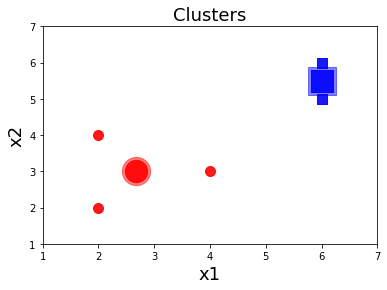

In [64]:
# Scatter plot of the data asigning each point to the cluster it belongs to ¡¡

plt.scatter(df1.x1,df1.x2, color='r', marker='o', s=100, alpha=0.9)
plt.scatter(df2.x1,df2.x2, color='b', marker='s', s=100, alpha=0.9)

plt.scatter(C1[0], C1[1], color='r', marker='o', s=800, alpha=0.5)
plt.scatter(C2[0], C2[1], color='b', marker='s', s=800, alpha=0.5)

plt.scatter(C1new[0], C1new[1], color='r', marker='o', s=500, alpha=0.9)
plt.scatter(C2new[0], C2new[1], color='b', marker='s', s=500, alpha=0.9)

plt.title('Clusters', fontsize=18)
plt.xlabel('x1', fontsize=18)
plt.ylabel('x2', fontsize=18)

plt.xlim(1,7)
plt.ylim(1,7)

plt.show()


## 6: Until the centroids do not change 

If the centroids do not change, then, none of the data points change of the assigned cluster


In [65]:
print(C1)
print(C1new)


[2.66666667 3.        ]
[2.66666667 3.        ]


In [66]:
print(C2)
print(C2new)


[6.  5.5]
[6.  5.5]


#### If the centroids do change... go to 3 (recall to use the new centroids)

#### If the centroids do not change... done ¡¡

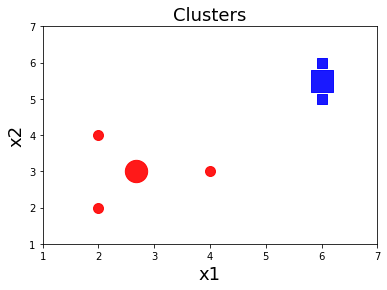

In [67]:
# Scatter plot of the data asigning each point to the cluster it belongs to ¡¡

plt.scatter(df1.x1,df1.x2, color='r', marker='o', s=100, alpha=0.9)
plt.scatter(df2.x1,df2.x2, color='b', marker='s', s=100, alpha=0.9)

plt.scatter(C1new[0], C1new[1], color='r', marker='o', s=500, alpha=0.9)
plt.scatter(C2new[0], C2new[1], color='b', marker='s', s=500, alpha=0.9)

plt.title('Clusters', fontsize=18)
plt.xlabel('x1', fontsize=18)
plt.ylabel('x2', fontsize=18)

plt.xlim(1,7)
plt.ylim(1,7)

plt.show()